### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Loading Advertisement dataset from

<a href = "https://statlearning.com">Stats Learning Website</a>


In [2]:
data = pd.read_csv('https://www.statlearning.com/s/Advertising.csv',index_col=0)
# Visualize data
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Perform basic descriptive Statistics

In [3]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
# .info() function is used to provide information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


### Correlation Analysis 
Looking at correlation among features

<Axes: >

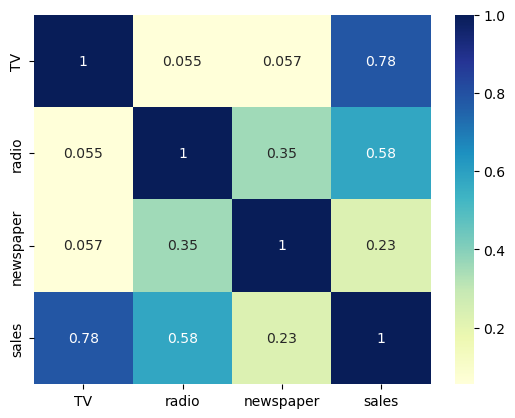

In [5]:
# .corr() method calculates the correlation

sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)

# 1 means highly correlated 0 means no correlation

#### Visualizing Data features vs target (Independent Variable vs Dependent Variable)<br>
**y vs x**<br>
**(TV, Radio, Newspaper VS Sales)**

Text(0.5, 1.0, 'newspaper vs Sales')

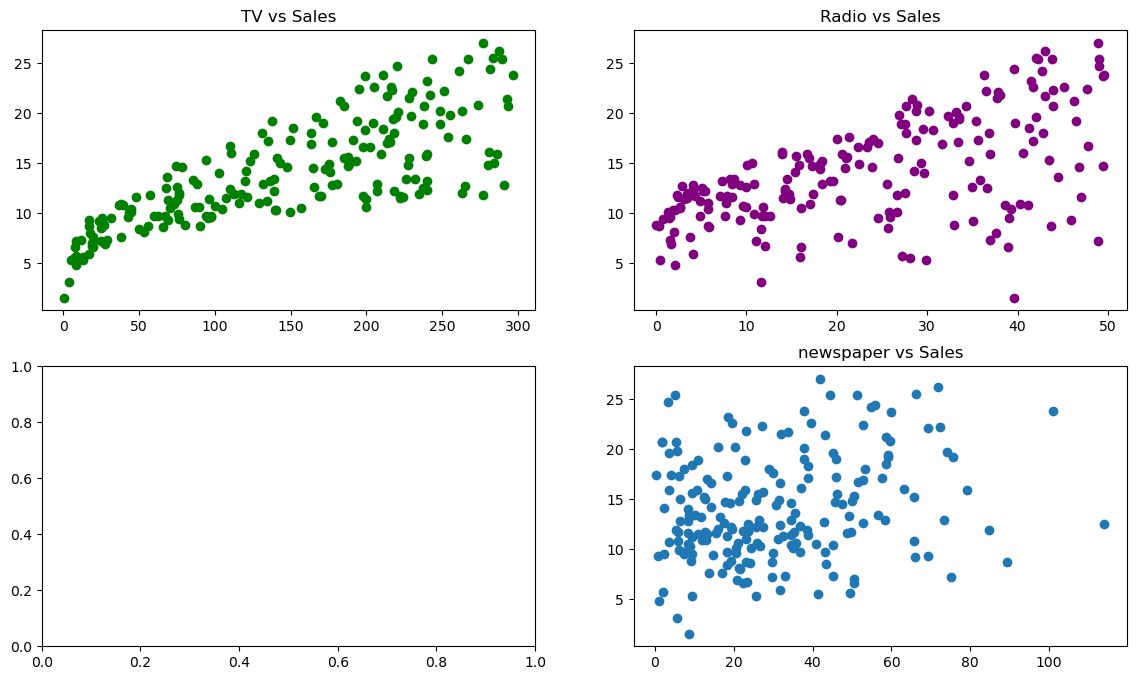

In [6]:
fig, axes = plt.subplots(2,2,figsize=(14,8))
axes[0,0].scatter(data.TV,data.sales,color='g')
axes[0,0].set_title("TV vs Sales")
axes[0,1].scatter(data.radio,data.sales,color='purple')
axes[0,1].set_title("Radio vs Sales")
axes[1,1].scatter(data.newspaper,data.sales)
axes[1,1].set_title("newspaper vs Sales")


### Seperating Target and Features in X and y
**or we can say Dependent and Independent Variables**

In [7]:
# Removing Sales Column from Data for making features dataset X
X = data.drop(columns=["sales"])
# Selecting only Sales column as we need to estimate our model for dependent variable y
y = data["sales"]

print(
    "Shape of Independent Features: ",
    X.shape,
    f"i.e. {X.shape[0]} rows and {X.shape[1]} features",
)
#  This is important while fitting model using Statistical Library Statsmodels and OLS Technique
# While using sklearn's Linear Regression Library it automatically estimates for constant
# Add constant for intercept
# X = sm.add_constant(X)

Shape of Independent Features:  (200, 3) i.e. 200 rows and 3 features


### Fitting the model

1. Using Linear Regression

In [8]:
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

In [9]:
# If we want to view all the methods that we can use we can use dir
print(dir(model))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_decision_function', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_set_intercept', '_validate_data', '_validate_params', 'coef_', 'copy_X', 'feature_names_in_', 'fit', 'fit_intercept', 'get_metadata_routing', 'get_params', 

In [10]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [11]:
# for eqn y = m1X1 + m2X2 + m3X3 + c
# We can get values of the linear eqn using model coefficient
print(f"c(Intercept) = {model.intercept_} and m1, m2 m3(Slopes) = {model.coef_}")

c(Intercept) = 2.9388893694594085 and m1, m2 m3(Slopes) = [ 0.04576465  0.18853002 -0.00103749]


### Let's compare mathematical Eqn with model's output

In [12]:
# i gives which row to compare
i = 5
print(
    f"Independent Variables: \n{X.iloc[i]} \nDependent Variable (Target) \n{y.iloc[i]}"
)

# Model Predicted Output
print("Predicted by our Linear Regression Model: ", y_pred[i])
print("-"*80)
print(
    "Value Computed using m1,m2,m3 and c values: ",
    np.sum(X.iloc[i].values * model.coef_) + model.intercept_,
)

Independent Variables: 
TV            8.7
radio        48.9
newspaper    75.0
Name: 6, dtype: float64 
Dependent Variable (Target) 
7.2
Predicted by our Linear Regression Model:  12.478347634035844
--------------------------------------------------------------------------------
Value Computed using m1,m2,m3 and c values:  12.478347634035844


#### Using Ordinary Least Squares Method and statsmodels library

In [92]:
X = sm.add_constant(X)
# Firstly using OLS Technique and Statsmodels Library
ols_model = sm.OLS(y, X).fit()

# Summary of the model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           1.58e-96
Time:                        20:04:13   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [33]:
### Compare Model Coefficients with the coef value in above table
print(f"Coefficients from Linear Regression model: {model.coef_}\nIntercept: {model.intercept_}")

Coefficients from Linear Regression model: [ 0.04576465  0.18853002 -0.00103749]
Intercept: 2.9388893694594085


### Computing Residuals

Text(0, 0.5, 'Residuals')

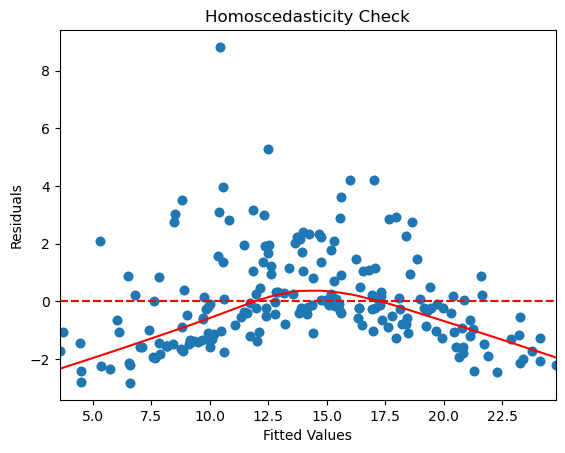

In [71]:
residuals = y_pred - y
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1.5})
plt.scatter(y_pred,residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homoscedasticity Check')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

<Axes: ylabel='Count'>

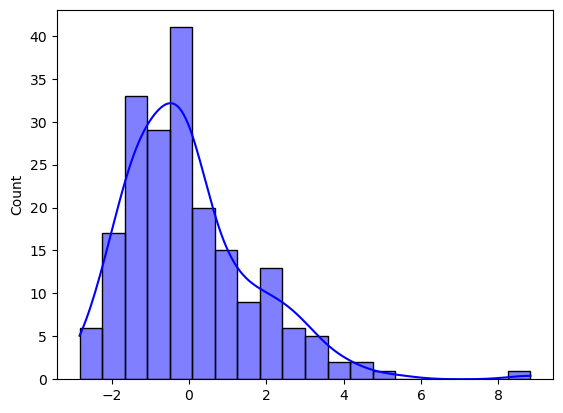

In [74]:
# Plotting the distribution of residuals

sns.histplot(residuals.values, kde=True, bins=20, color='blue')

# Little bit right skewed data but residual distribution is okay to apply regression

### Regression Diagnostics

**Assumption:** No Autocorrelation among residuals (Errors)<br>

**Method:** Durbin Watson
\begin{equation}
    DW = \frac{\sum_{t=2}^{n} (e_t - e_{t-1})^2}{\sum_{t=1}^{n} e_t^2}
\end{equation}


In [21]:
from statsmodels.stats.stattools import durbin_watson


# Perform Durbin-Watson test
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat}")
# Interpretation
if 1.5 <= dw_stat <= 2.5:
    print("No significant autocorrelation.")
elif dw_stat < 1.5:
    print("Positive autocorrelation detected.")
else:
    print("Negative autocorrelation detected.")


Durbin-Watson Statistic: 2.083648405294408
No significant autocorrelation.


**Assumption:** Residuals are distributed Normality or constant variance<br>

**Method:** Q-Q Test

\begin{align}
    Q_i &= \text{Sample quantiles derived from the sorted data} \\
    T_i &= F^{-1}(p_i), \quad p_i = \frac{i}{n+1} \\
    \text{Q-Q Plot: } & (T_i, Q_i) \quad \text{should form a straight line if the distributions match.}
\end{align}


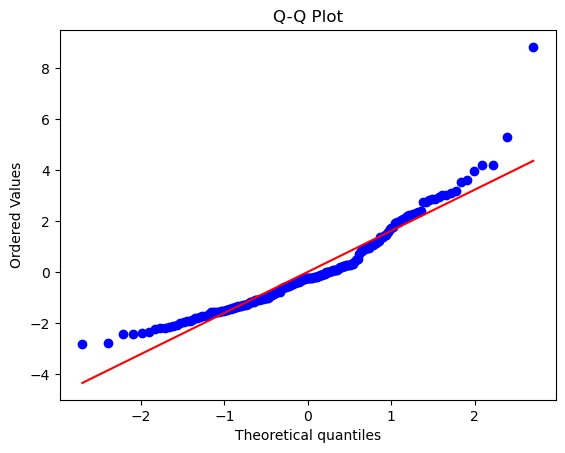

In [23]:
import scipy.stats as stats

# Q-Q plot Quantile Quantile Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


**Assumption:** No relationship between Independent Variables (No Multicollinearity)<br>

**Method:** Variance Inflation Factor
\begin{equation}
    \text{VIF}(X_i) = \frac{1}{1 - R_i^2}
\end{equation}


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant for VIF calculation
# X_const = add_constant(X)

# Calculate VIF for each feature
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(f"VIF: {vif}")


VIF: [6.848899953334954, 1.0046107849396502, 1.1449519171055353, 1.1451873787239288]


### Interpreting VIF Values

- **VIF = 1**: No multicollinearity.  
- **1 < VIF ≤ 5**: Low to moderate multicollinearity (generally acceptable).  
- **5 < VIF ≤ 10**: High multicollinearity (may require action, such as removing or combining variables).  
- **VIF > 10**: Severe multicollinearity (requires immediate attention).  


#### Goodness of Fit
**Assumption:** How well model is fitting the data<br>

**Method:** R2, 
\begin{align}
    R^2 &= 1 - \frac{\text{SS}_{\text{residual}}}{\text{SS}_{\text{total}}} \\
    R^2_{\text{adj}} &= 1 - \left( \frac{n-1}{n-p-1} \right) \left( 1 - R^2 \right) \\
    \text{SSE} &= \sum_{i=1}^n (y_i - \hat{y}_i)^2  \\
    \text{MSE} &= \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
\end{align}

**R2** gives how well the model explains the variability in the dependent variable.

In [59]:
from sklearn.metrics import mean_squared_error
print("R2 Score: ", ols_model.rsquared)
print("Adjusted R2 Score: ",ols_model.rsquared_adj)
# 0-1 Range
print("Mean Squared error: ",mean_squared_error(y,y_pred))
# As this value does not have finite range so it is difficult to compare but Lower the better

R2 Score:  0.8972106381789522
Adjusted R2 Score:  0.8956373316204668
Mean Squared error:  2.784126314510936


#### Detecting Outlier Data points

**Method:** Cooks Distance (For identifying influential point e.g. Outliers)
\begin{align}
    D_i = \frac{(e_i^2 / p) \cdot h_{ii}}{(1 - h_{ii})^2}
\end{align}

In [77]:
from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(ols_model)
(c, p) = influence.cooks_distance

/tmp/ipykernel_63225/3999392339.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)


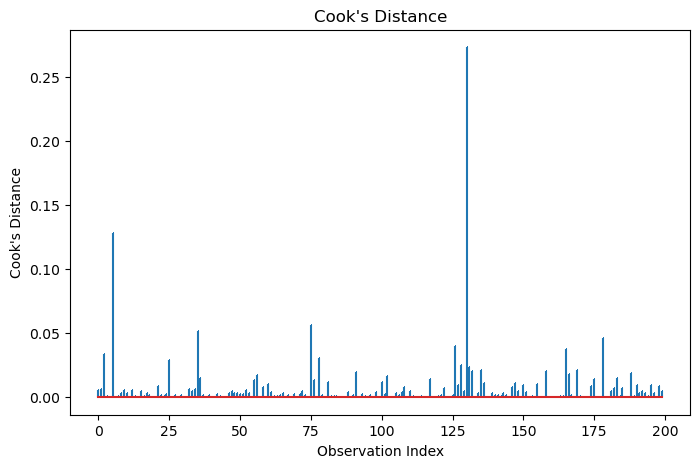

In [80]:
plt.figure(figsize=(8, 5))
plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
plt.title("Cook's Distance")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.show()

You can see the index with higher cook's distance can be considered outliers in data and we can remove them accordingly.<br>

Here we only have values till 0.3 but still as out data points are 200<br>
We need to create some threshold value for this

\begin{equation}
    threshold = 4 / n
\end{equation}
where n=200
\begin{equation}
    threshold = 0.02
\end{equation}

We have to remove values with cook's distance greater than 0.2
    

In [86]:
threshold = 4 / len(X)  # General rule of thumb
outliers = np.where(c > threshold)[0]

In [88]:
X_clean = X.drop(index=outliers)
y_clean = y.drop(index=outliers)
model_clean = sm.OLS(y_clean, X_clean).fit()
print(model_clean.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     624.7
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           7.11e-95
Time:                        19:48:58   Log-Likelihood:                -342.45
No. Observations:                 184   AIC:                             692.9
Df Residuals:                     180   BIC:                             705.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9019      0.305      9.512      0.0

After removing the influential data points we can see the improved model.
R2 = 0.912

**Q.  Do Comparative Analysis of the model.**

### AIC and BIC 
**Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC)**

\begin{align}
    \text{AIC} = 2k - 2 \ln(\hat{L}) \\
    \text{BIC} = \ln(n) \cdot k - 2 \ln(\hat{L})
\end{align}

AIC and BIC are used for model selection. <br>
A lower AIC or BIC indicates a better model,<br>
AIC favors fit and BIC favors simplicity (Penalizes Complex Models)<br>

In [95]:
print("AIC: ",ols_model.aic)
print("BIC: ",ols_model.bic)

AIC:  780.3622358887662
BIC:  793.5555053549584


### Interpreting the Output: <br>
##### The AIC and BIC values help to compare different models:
- Lower values of AIC and BIC suggest a better model.

- AIC penalizes complexity less than BIC.

- BIC adds a stronger penalty for the number of parameters, making it more likely to prefer 

- simpler models, especially when the dataset is large.

### Q. Explore White Tests for Homoscedasticity